In [1]:
import os
os.chdir("C:/Users/zetru/OneDrive/Mémoire python/")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 16, 9
plt.rcParams['axes.grid'] = True
import seaborn as sns
sns.set_theme(style="whitegrid")

In [2]:
import os
os.chdir("C:/Users/zetru/OneDrive/Mémoire python/")
import numpy as np
import pandas as pd
df=pd.read_hdf('df_v5.h5','df_v5')
df

,cp,id,nom_carburant,id_carburant,maj,valeur,litre_brut,type,latitude,longitude,ville,stations_rayon_5km,competition_geo
0,01,1000001,Gazole,1,2022-01-03,0.702500,0.435626,R,46.201,5.198,SAINT-DENIS-LèS-BOURG,5,3
1,01,1000001,Gazole,1,2022-01-05,0.692500,0.447949,R,46.201,5.198,SAINT-DENIS-LèS-BOURG,5,3
2,01,1000001,Gazole,1,2022-01-10,0.728333,0.452874,R,46.201,5.198,SAINT-DENIS-LèS-BOURG,5,3
3,01,1000001,Gazole,1,2022-01-17,0.739167,0.484043,R,46.201,5.198,SAINT-DENIS-LèS-BOURG,5,3
4,01,1000001,Gazole,1,2022-01-21,0.769167,0.497616,R,46.201,5.198,SAINT-DENIS-LèS-BOURG,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4537444,95,95870010,SP98,6,2022-12-23,0.856233,0.488413,R,48.936,2.206,Bezons,15,4
4537445,95,95870010,SP98,6,2022-12-27,0.874567,0.487324,R,48.936,2.206,Bezons,15,4
4537446,95,95870010,SP98,6,2022-12-28,0.874567,0.484175,R,48.936,2.206,Bezons,15,4
4537447,95,95870010,SP98,6,2022-12-29,0.879567,0.477600,R,48.936,2.206,Bezons,15,4


In [3]:
df['nom_carburant'] = df['nom_carburant'].replace({'E10': 'SP95-E10'})

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 16, 9
plt.rcParams['axes.grid'] = True

In [5]:
df.groupby(['maj'])['litre_brut'].mean().mean()

0.6035232204907219

In [6]:
df_stats=pd.DataFrame(df.groupby(['nom_carburant','maj'])['valeur'].mean())
df_stats

valeur
nom_carburant maj                 
E85           2022-01-01  0.507524
              2022-01-02  0.509262
              2022-01-03  0.500251
              2022-01-04  0.507993
              2022-01-05  0.510227
...                            ...
SP98          2022-12-27  0.839136
              2022-12-28  0.835993
              2022-12-29  0.852364
              2022-12-30  0.859754
              2022-12-31  0.856226

[2190 rows x 1 columns]

In [7]:
df_stats.reset_index(inplace=True)

In [8]:
df_brent=pd.DataFrame(df.groupby(['maj'])['litre_brut'].mean())
df_brent.reset_index(inplace=True)

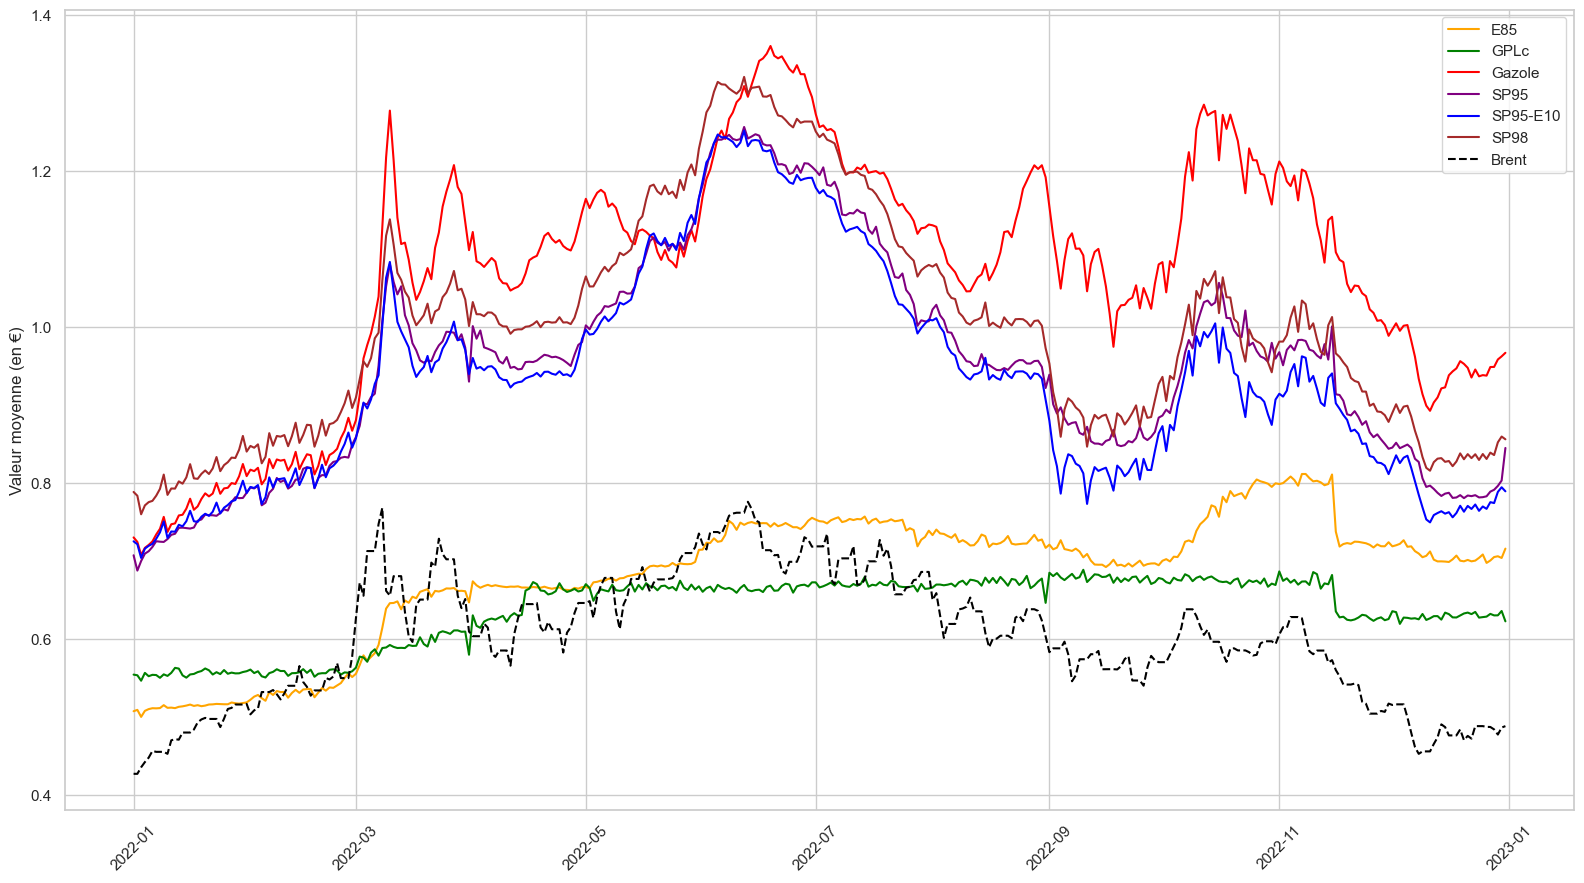

In [9]:
couleurs_carburants = {
    'Gazole': 'red',
    'SP95': 'purple',
    'SP98': 'brown',
    'E85': 'orange',
    'GPLc': 'green',
    'SP95-E10': 'blue'
}

for carburant in df_stats['nom_carburant'].unique():
    subset = df_stats[df_stats['nom_carburant'] == carburant]
    plt.plot(subset['maj'], subset['valeur'], label=carburant, color=couleurs_carburants[carburant])
    
plt.plot(df_brent['maj'],df_brent['litre_brut'],label='Brent', color='black', linestyle='--')

plt.ylabel('Valeur moyenne (en €)') 
plt.legend()  
plt.xticks(rotation=45) 
plt.tight_layout() 

plt.savefig('graph/Evolution_prix_détail_2022_E85_GPLc_compris.png')

plt.show()

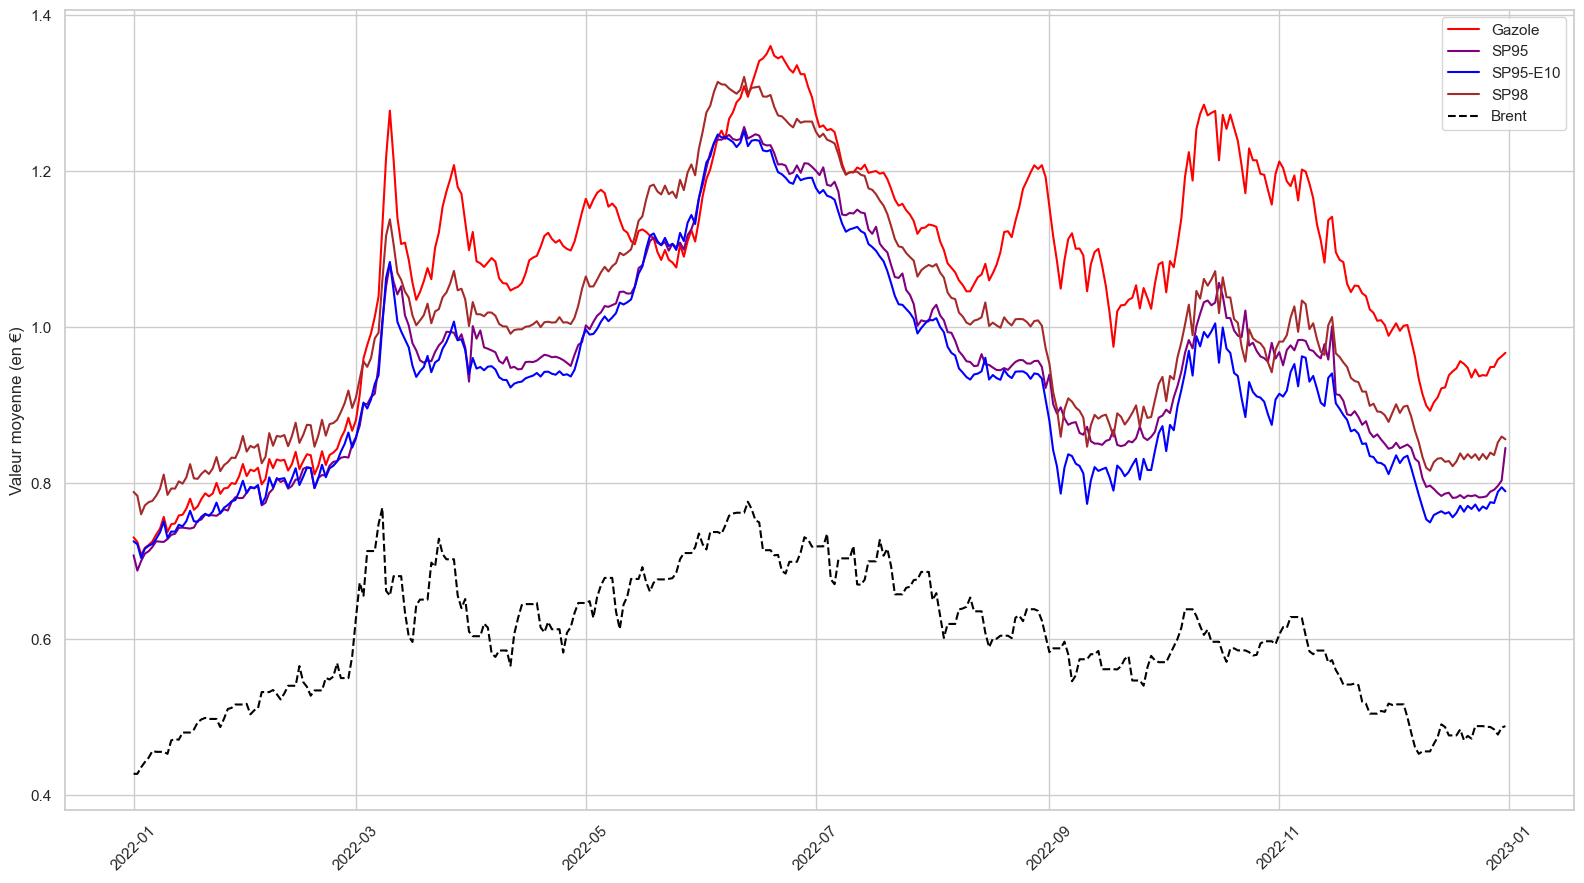

In [10]:
df_stats1=df_stats.loc[~df_stats.iloc[:, 0].isin(['E85', 'GPLc'])]

couleurs_carburants = {
    'Gazole': 'red',
    'SP95': 'purple',
    'SP98': 'brown',
    'SP95-E10': 'blue'
}
for carburant in df_stats1['nom_carburant'].unique():
    subset1 = df_stats1[df_stats1['nom_carburant'] == carburant]
    plt.plot(subset1['maj'], subset1['valeur'], label=carburant, color=couleurs_carburants[carburant])

plt.plot(df_brent['maj'],df_brent['litre_brut'],label='Brent', color='black', linestyle='--')


plt.ylabel('Valeur moyenne (en €)') 
plt.legend() 
plt.xticks(rotation=45)  
plt.tight_layout()

plt.savefig('graph/Evolution_prix_détail_2022.png')
plt.show()

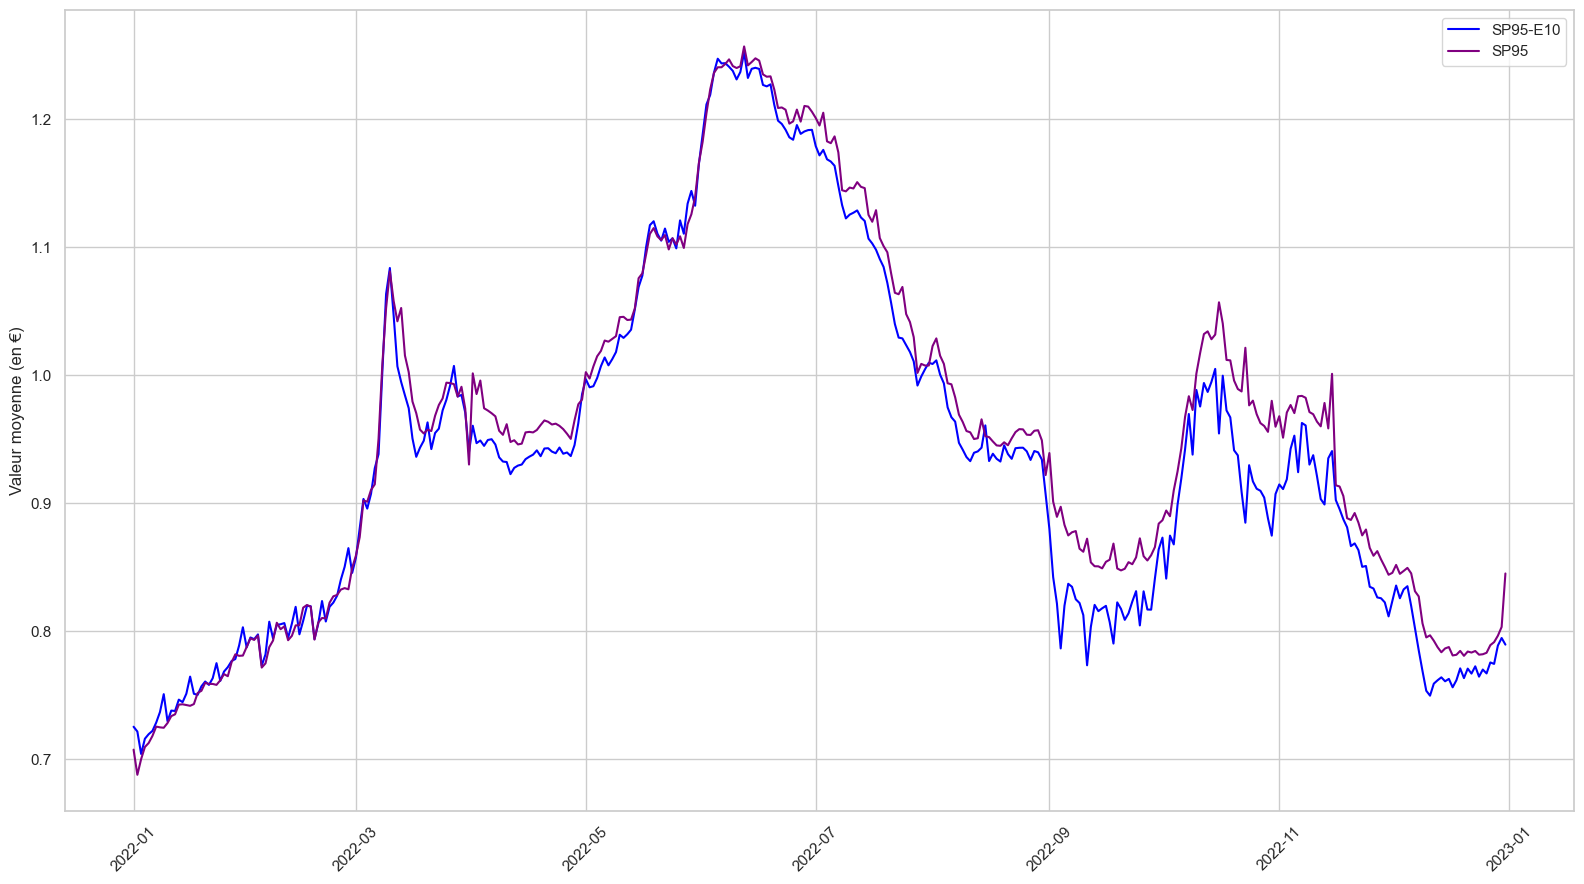

In [14]:
df_stats1=df_stats.loc[~df_stats.iloc[:, 0].isin(['E85', 'GPLc'])]

couleurs_carburants = {
    'Gazole': 'red',
    'SP95': 'purple',
    'SP98': 'brown',
    'SP95-E10': 'blue'
}

subset1 = df_stats1[df_stats1['nom_carburant'] == 'SP95-E10']
subset2 = df_stats1[df_stats1['nom_carburant'] == 'SP95']
plt.plot(subset1['maj'], subset1['valeur'], label='SP95-E10', color=couleurs_carburants['SP95-E10'])
plt.plot(subset1['maj'], subset2['valeur'], label='SP95', color=couleurs_carburants['SP95'])



plt.ylabel('Valeur moyenne (en €)') 
plt.legend() 
plt.xticks(rotation=45)  
plt.tight_layout()

plt.show()

In [15]:
np.corrcoef(subset1.iloc[:,-1], subset2.iloc[:,-1])

array([[1.        , 0.98696768],
       [0.98696768, 1.        ]])

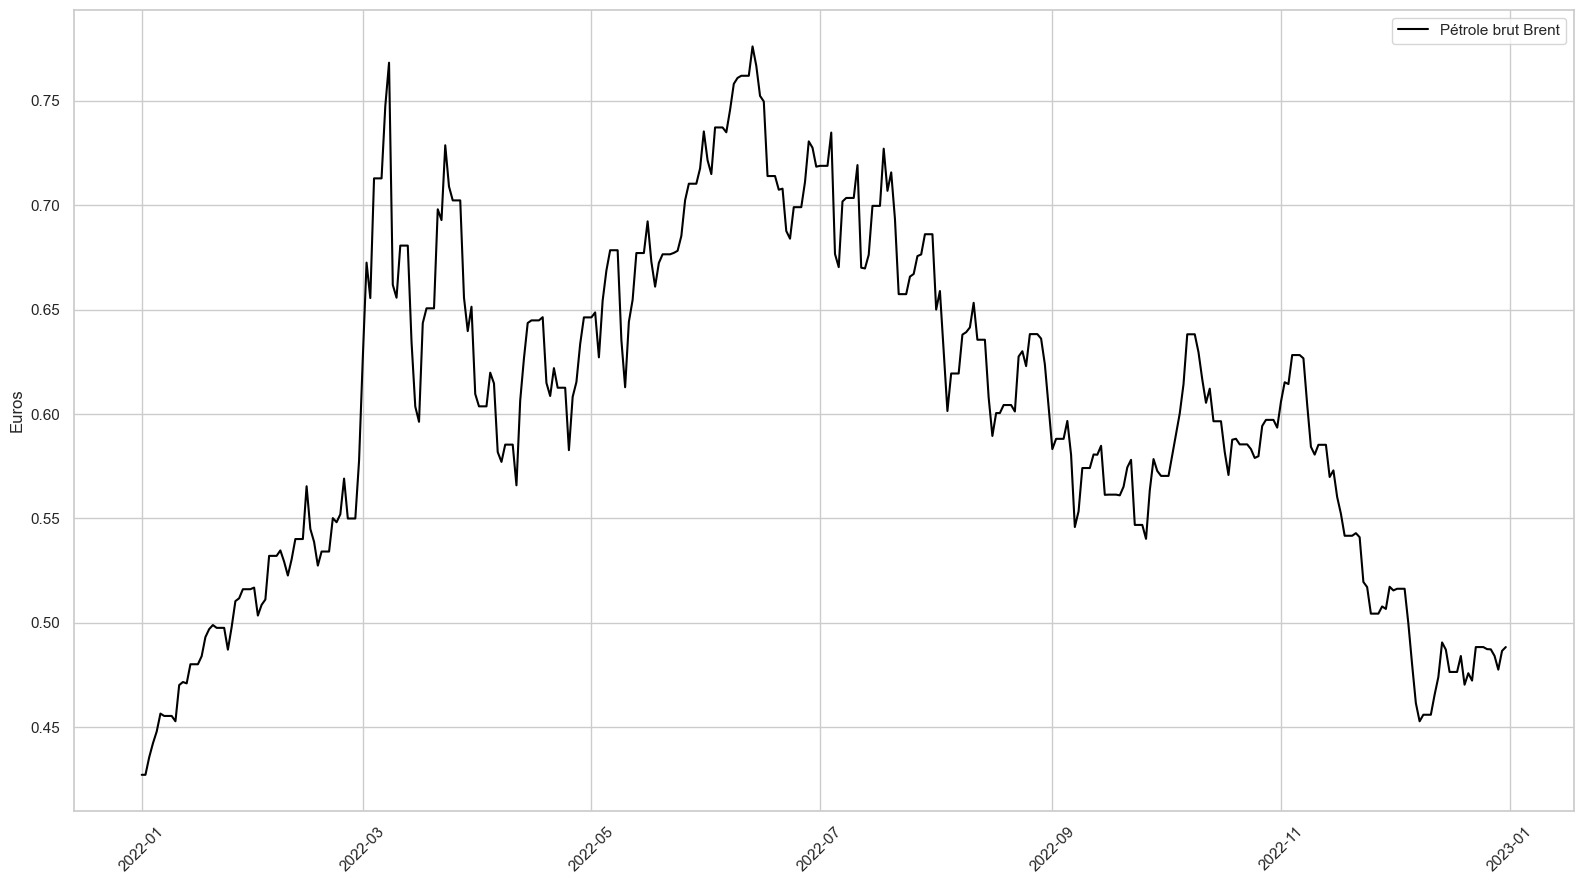

In [16]:
plt.plot(df_brent['maj'],df_brent['litre_brut'],label='Pétrole brut Brent', color='black')

plt.ylabel('Euros') 
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.legend()
plt.savefig('graph/Evolution_cours_brent_2022_euros.pdf')

plt.show()

In [17]:
df_brent['litre_brut'].mean()

0.6035232204907219

In [18]:
df_n=df[df['nom_carburant'].isin(['SP95','E10'])]
df_n

,cp,id,nom_carburant,id_carburant,maj,valeur,litre_brut,type,latitude,longitude,ville,stations_rayon_5km,competition_geo
138,01,1000001,SP95,2,2022-01-03,0.695633,0.435626,R,46.201,5.198,SAINT-DENIS-LèS-BOURG,5,3
139,01,1000001,SP95,2,2022-01-05,0.687300,0.447949,R,46.201,5.198,SAINT-DENIS-LèS-BOURG,5,3
140,01,1000001,SP95,2,2022-01-06,0.693967,0.456551,R,46.201,5.198,SAINT-DENIS-LèS-BOURG,5,3
141,01,1000001,SP95,2,2022-01-10,0.711467,0.452874,R,46.201,5.198,SAINT-DENIS-LèS-BOURG,5,3
142,01,1000001,SP95,2,2022-01-17,0.716467,0.484043,R,46.201,5.198,SAINT-DENIS-LèS-BOURG,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4524784,95,95570003,SP95,2,2022-12-30,0.782067,0.486593,R,49.041,2.342,MOISSELLES,8,3
4526468,95,95600001,SP95,2,2022-01-03,0.723767,0.435626,R,48.978,2.291,EAUBONNE,16,4
4526469,95,95600001,SP95,2,2022-01-04,0.740433,0.442323,R,48.978,2.291,EAUBONNE,16,4
4526470,95,95600001,SP95,2,2022-10-28,0.821267,0.597232,R,48.978,2.291,EAUBONNE,16,4


In [19]:
df_ag=pd.DataFrame(df_n.groupby(['maj'])['valeur'].mean()).reset_index()
df_ag

,maj,valeur
0,2022-01-01,0.707498
1,2022-01-02,0.687861
2,2022-01-03,0.700118
3,2022-01-04,0.709561
4,2022-01-05,0.712683
...,...,...
360,2022-12-27,0.789126
361,2022-12-28,0.791479
362,2022-12-29,0.796477
363,2022-12-30,0.803341


In [20]:
np.corrcoef(df_ag['valeur'], df_brent['litre_brut'])

array([[1.        , 0.90458718],
       [0.90458718, 1.        ]])

In [21]:
np.corrcoef(subset1.iloc[:,-1], df_brent['litre_brut'])

array([[1.        , 0.90908428],
       [0.90908428, 1.        ]])